### BIOSCREEN-AT model decription ###

<div align="justify">
The BIOSCREEN-AT, provided in Karanovic et al. (2007) Model provides an exact analytical Solution to the BIOSCREEN Model. The model provides a three-dimensional solution for transport of dissolved contaminants, incorporating natural attenuation processes. As shown in Fig. 1 below , the source is given as a patch specified-concentration boundary condition.
</div>

<div align="center">
<figure>
  <img src="bioscreen_at.png" alt="The BiOSCREEN Schematic setup" style="width:30%">
  <figcaption>Fig.1 - The BiOSCREEN Schematic setup.</figcaption>
</figure> </div>



$$
c(x,y,z, t) = C_0 \frac{x}{8\sqrt{\pi D_x'}}\exp(-\gamma t)
\times \int\limits_0^t\frac{1}{\xi^{3/2}}\exp\Bigg\{(\gamma-\lambda_{EFF})\xi- \frac{(x-v'\xi)^2}{4D_x'\xi}\Bigg\}\times\\
\times\Bigg[\text{erfc}\Bigg\{\frac{y-\frac{w}{2}}{2\sqrt{D_y'\xi}}
\Bigg\}-\text{erfc}\Bigg\{\frac{y+\frac{w}{2}}{2\sqrt{D_y'\xi}}
\Bigg\}\Bigg]
\times \Bigg[\text{erfc}\Bigg\{\frac{z-H}{2\sqrt{D_z'\xi}}\Bigg\}-
\text{erfc}\Bigg\{\frac{z+H}{2\sqrt{D_z'\xi}} 
\Bigg\}\Bigg]\text{d}\xi
$$

with symbols:


$c_0$ = initial source concentration (mg/L)<br/>
$D'x$ = dispersion coefficient divided by retardation ($R$) factor $D_x/R$<br/>
$D'y$ = dispersion coefficient divided by retardation factor $D_y/R$<br/>
$D'z$ = dispersion coefficient divided by retardation factor $D_z/R$<br/>
$\gamma$ = source decay coefficient <br/>
$\lambda_{EFF}$ = effective first order decay coefficient<br/>
$W$ = source width (m)<br/>
$H$ = source depth (m)

Among the most important assumptions of the model are:

1. Aquifer extends semi-infinite in $x$-direction, infinite in $y$-direction and extends from water table to relatively large depth.
2. Groundwater flow is steady and one dimensional.
3. The solute undergoes equilibrium sorption and first-order transformation reactions.
4. The aquifer is homogeneous and $L_{max}$ is always found on the center line.

The complete details and the assumptions of the model is provided in Karanovic et al. (2007)

**Reference**

Karanovic, M., Neville, C.,  and Andrews, C., (2007), BIOSCREEN-AT: BIOSCREEN with an Exact Analytical Solution. Vol. 45(2), pp. 242-245, Groundwater.

**The contents including codes are [CC 4.0 BY](https://creativecommons.org/licenses/by/4.0/) licensed.**


### Short description of model parameters ###

<div align="justify">
  
<mark>Threshold Concentration:</mark> The evaluation of the analytical solution shows, that the contaminant concentration $C \to 0$ for $x \to \infty$. Due to this asymptotical convergence, it is required to provide a threshold concentration, which defines the $L_{max}$ concentration contour level. This threshold should be close to a concentration of 0 or one could also choose value equaling water quality standards.</div>
<br>

<div align="justify">
<mark>Time:</mark> The BIOSCREEN analytical solution is a transient solution, which means that the state of the contaminant plume is dependent of time. The interaction of plume growing effects and attenuation processes will often result in a state of equilibrium in which the plume keeps a constant size. It is not possible to define a global valid period after which a steady state is reached, since this dependes heavily on the hydrogeologic conditions. However, a simple approximation can be used based on the decay within the plume $t=\frac{1}{\lambda}+5$ [y]. But it is important to note that this approach does <b>not<\b> guarantee the steady state of the plume. It is therefore recommended to use a value of at least 20 years (default value).  </div>
    
<br>
    
<div align="justify">
<mark>Longitudinal Dispersivity:</mark> is an aquifer parameter which effects the intensity of mixing in the liquid phase along the $x$-axis.</div>
    

<br>
    
<div align="justify">
<mark>Horizontal Transverse Dispersivity:</mark> effects the mixing intensity of the liquid phase along the $y$-axis.   </div>

<br>
    
<div align="justify">
<mark>Vertical Transverse Dispersivity:</mark>  effects the mixing intensity of the liquid phase along the $z$-axis.   </div>

<br>
    
<div align="justify">
<mark>Effective Diffusion Coefficient:</mark> this parameter defines particle movement and therefore the effect of plume growth based on Brownian molecular motion. For most scenarios it has a negligible role. But for cases with very low groundwater velocities and long time periods it gains on impact on the result.   </div> 

<br>
    
<div align="justify">
<mark>Retardation Factor:</mark>  the ratardation factor quantifies natural attenuation processes such as adsorption and desorption of particles over time in the soil matrix. Very high ratardation factors result in smaller plumes due to stronger attenuation of the contamination.    </div>

<br>
    
<div align="justify">
<mark>Source Decay Coefficient :</mark> describes the degredation of the source and therefore the decrease of the contaminant concentration within the source. This can be the result of biological degredation of the contaminant or other forms of decay.   </div>

<br>
    
<div align="justify">
<mark>Decay Coefficient:</mark> describes the decay of the contaminant within the plume. It occurs due to the same reasons as the source decay, but in addition a stronger degredation comes from oxidation and chemical reactions with other chemical compounds that are available.  

### Solution Approach for BIOSCREEN-AT ###

<div align="justify">
The concentration contour for BIOSCREEN-AT (see equation above) includes an integral that has to be numerically solved for obtaining $L_{max}$. The $L_{max}$ in this case is the  <b>centereline</b> maximum longitudinal extend of the selected threshold concentration contour. </div>
<br>
<div align="justify">
    
The integral is solved using <a href="https://en.wikipedia.org/wiki/Gauss%E2%80%93Legendre_quadrature">Gauss-Legendre Quadrature</a> to obtain $C(x,y,z)$. The Gauss-Legendre Quadrature method requires specifying the number of sample points (called <b>Gauss points</b>), based on which corresponding specific weights are obtained. The weights are then used to obtain the solution. Generally, higher the Gauss points, the higher the accuracy of the solution. However, higher sample points also means a large number of computations.</div> 
<br>

<mark><b>NOTE:</b></mark>: <b> The solution provided below is for the <i>L<sub>max</sub></i> and not for concentration $C(x,y,z,t)$ distribution. Note that <i>L<sub>max</sub></i> is steady-state quantity

In [1]:
# The used Python library

import numpy as np
import scipy as sp
from scipy import special
import pandas as pd
import matplotlib.pyplot as plt

### The model input quantities ###

Change the value of the qunatities here. Note that computation time depends on the model input values.

In [15]:
n = 10





Co_all = np.linspace(0,120,n)
t_all = np.linspace(1, 50, 10)
H_all = np.linspace(1, 16, n)
w_all = np.linspace(1, 300, n)
v_all = np.linspace(1, 60, n)
alx_all = np.linspace(1.5, 30.5, n)
ath_all = np.linspace(0.1, 10, n)
vth_all = np.linspace(0.01, 0.50, n)
Df_all = np.linspace(0,0.1, n)
R_all = np.linspace(1,10, n)
SD_g_all = np.linspace(0.001,0.69, 15)
Deg_c_all = np.linspace(0.04,1, n)

In [16]:
SD_g_all=np.repeat(SD_g_all , 10)
SD_g_all.shape

(150,)

In [17]:
SD_g_all

array([0.001     , 0.001     , 0.001     , 0.001     , 0.001     ,
       0.001     , 0.001     , 0.001     , 0.001     , 0.001     ,
       0.05021429, 0.05021429, 0.05021429, 0.05021429, 0.05021429,
       0.05021429, 0.05021429, 0.05021429, 0.05021429, 0.05021429,
       0.09942857, 0.09942857, 0.09942857, 0.09942857, 0.09942857,
       0.09942857, 0.09942857, 0.09942857, 0.09942857, 0.09942857,
       0.14864286, 0.14864286, 0.14864286, 0.14864286, 0.14864286,
       0.14864286, 0.14864286, 0.14864286, 0.14864286, 0.14864286,
       0.19785714, 0.19785714, 0.19785714, 0.19785714, 0.19785714,
       0.19785714, 0.19785714, 0.19785714, 0.19785714, 0.19785714,
       0.24707143, 0.24707143, 0.24707143, 0.24707143, 0.24707143,
       0.24707143, 0.24707143, 0.24707143, 0.24707143, 0.24707143,
       0.29628571, 0.29628571, 0.29628571, 0.29628571, 0.29628571,
       0.29628571, 0.29628571, 0.29628571, 0.29628571, 0.29628571,
       0.3455    , 0.3455    , 0.3455    , 0.3455    , 0.3455 

In [3]:
t = np.array([])
for i in t_all:
     a_comb = np.array([i])
     t = np.concatenate((t, a_comb))
                               
            
t







array([ 1.        ,  6.44444444, 11.88888889, 17.33333333, 22.77777778,
       28.22222222, 33.66666667, 39.11111111, 44.55555556, 50.        ])

In [4]:
t_array = np.array([0])

t_array = np.append(t, t)
t_array = np.append(t_array, t_array)
t_array = np.append(t_array, t_array)
#t_array = np.append(t_array, t_array)
t_array = np.append(t_array, t)
t_array = np.append(t_array, t)
t_array = np.append(t_array, t)    
t_array = np.append(t_array, t)
t_array = np.append(t_array, t)
t_array = np.append(t_array, t)
t_array = np.append(t_array, t)
#t_array = np.append(t_array, t)
#t_array = np.append(t_array, t)
#t_array = np.append(t_array, t)
#t_array = np.append(t_array, t)
#t_array = np.append(t_array, t)
#t_array = np.append(t_array, t)
#t_array = np.append(t_array, t)
T = t_array
    
T.shape

(150,)

In [18]:
T

array([ 1.        ,  6.44444444, 11.88888889, 17.33333333, 22.77777778,
       28.22222222, 33.66666667, 39.11111111, 44.55555556, 50.        ,
        1.        ,  6.44444444, 11.88888889, 17.33333333, 22.77777778,
       28.22222222, 33.66666667, 39.11111111, 44.55555556, 50.        ,
        1.        ,  6.44444444, 11.88888889, 17.33333333, 22.77777778,
       28.22222222, 33.66666667, 39.11111111, 44.55555556, 50.        ,
        1.        ,  6.44444444, 11.88888889, 17.33333333, 22.77777778,
       28.22222222, 33.66666667, 39.11111111, 44.55555556, 50.        ,
        1.        ,  6.44444444, 11.88888889, 17.33333333, 22.77777778,
       28.22222222, 33.66666667, 39.11111111, 44.55555556, 50.        ,
        1.        ,  6.44444444, 11.88888889, 17.33333333, 22.77777778,
       28.22222222, 33.66666667, 39.11111111, 44.55555556, 50.        ,
        1.        ,  6.44444444, 11.88888889, 17.33333333, 22.77777778,
       28.22222222, 33.66666667, 39.11111111, 44.55555556, 50.  

In [13]:
lmax_all = []

for i in range(len(SD_g_all)):
    # Model input- you can change the values here

    # Concentrations
    #i = 0

    Co = 106.35 # [mg/l] source concentration 
    C_th = 5e-5 # [mg/l]  threshhold concentration, should be smaller than Co

    # time
    t = T[i] # [y]  time
#for j in range(len(A)):

    # Source Geometry
    H = 6.1 # [m]   source thickness 
    W = 20  # [m]  source width 

    # flow and mixing terms
    v = 292  #36  # [m/y]  average linear groundwater velocity
    alx  = 10.7 # ALX[i] # [m]  longitudinal dispersivity
    ath = 0.1*alx # [m]  Horizontal transverse dispersivity
    vth = 0.01*alx  # [m]  vertical transverse dispersivity
    Df = 0   # [m^2/y]   effective diffusion coefficient

    # reaction terms
    R = 1  # [-] Retardation term
    SD_g = SD_g_all[i] #SD_g_t[i] # [1/y]     Source decay coefficient [γ]      
    Deg_c = 0.445  #Deg_C_t[i]  # [1/y] effective First Order Decay Coefficient [λeff]       

    # computation factor
    GP =  256 # [-]     number of Gauss points  [4,5,6,10,15,20,60,104,256; default: 60) - this will effect your result and also computation time



    # interim computation (don't need to change anything here)

    y = 0  # [m]    fixed (Don't change this)
    z_1 = 0  # [m]  fixed (Don't change this)
    z = (z_1 + H) / 2  # [m] fixed (done't change this)

    Dx = alx * v + Df  # [m^2/y]
    Dy = ath * v + Df  # [m^2/y]
    Dz = vth * v + Df  # [m^2/y]

    vr = v/R  # [m/y]
    Dyr = Dy/R  # [m^2/y]
    Dxr = Dx/R  # [m^2/y]
    Dyr = Dy/R  # [m^2/y]
    Dzr = Dz/R  # [m^2/y]


    # Main Computation steps (Nothing to Change here)
# Main Computation steps (Nothing to Change here)

    def C(x):

        # Boundary Condition
        if x <= 1e-6:
            if y <= W / 2 and y >= -W / 2 and z <= H and z >= z_1:
                C = Co * np.exp(-SD_g * t)
            else:
                C = 0

        else:
            a = Co * np.exp(-SD_g * t) * x / (8 * np.sqrt(np.pi * Dxr))
            roots = sp.special.roots_legendre(GP)[0]
            weights = sp.special.roots_legendre(GP)[1]

                # scaling
            bot = 0
            top = np.sqrt(np.sqrt(t))
            Tau = (roots * (top - bot) + top + bot) / 2
            Tau4 = Tau ** 4

                # calculation
            xTerm = (np.exp(-(((Deg_c - SD_g) * Tau4) + ((x - vr * Tau4) ** 2) / (4 * Dxr * Tau4)))) / (Tau ** 3)
            yTerm = sp.special.erfc((y - W / 2) / (2 * np.sqrt(Dyr * Tau4))) - sp.special.erfc((y + W / 2) / (2 * np.sqrt(Dyr * Tau4)))
            zTerm = sp.special.erfc((z - H) / (2 * np.sqrt(Dzr * Tau4))) - sp.special.erfc((z - z_1) / (2 * np.sqrt(Dzr * Tau4)))
            Term = xTerm * yTerm * zTerm
            Integrand = Term * (weights * (top - bot) / 2)
            C = a * 4 * sum(Integrand)
            #print(C)
        return C
    x_array = np.array([0])
    c_array = np.array([C(0)])
    x = 0
    while C(x) >= C_th:
        x = x + 1
        x_array = np.append(x_array, x)
        c_array = np.append(c_array, C(x))
    else:
        lMax = "The maximum length of the plume is: %.2f m" % x
        print(x )

    # computing Lmax

    
    lmax_all.append(x)

640
2551
4119
5430
6142
6152
6149
6146
6142
6139
640
2551
4117
5424
6066
5895
5713
5532
5352
5173
640
2550
4116
5418
5974
5579
5179
4784
4394
4009
640
2550
4114
5412
5859
5181
4512
3862
3233
2632
640
2550
4113
5405
5708
4666
3669
2736
1892
1176
640
2549
4111
5399
5501
3983
2612
1470
662
232
640
2549
4110
5393
5200
3062
1411
458
107
0
640
2548
4108
5386
4727
1891
470
78
0
0
640
2548
4107
5380
3906
783
101
0
0
0
640
2547
4105
5374
2462
224
0
0
0
0
640
2547
4104
5367
947
49
0
0
0
0
640
2546
4102
5361
293
0
0
0
0
0
640
2546
4101
5354
87
0
0
0
0
0
640
2546
4099
5347
0
0
0
0
0
0
640
2545
4098
698
0
0
0
0
0
0


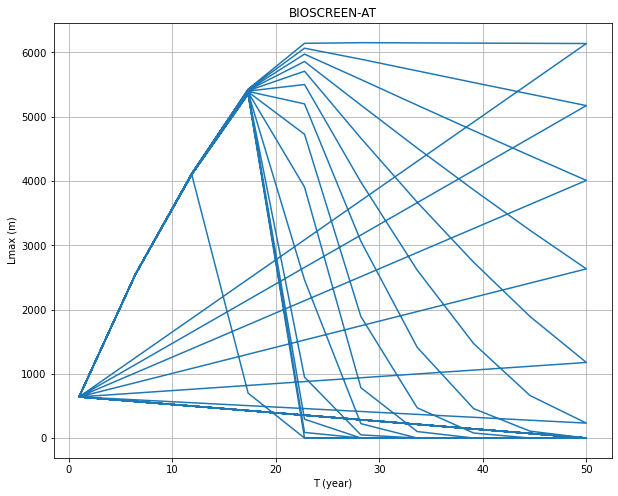

In [18]:
#plt.axes(yscale='log')
fig=plt.figure(figsize=(10,8))
plt.plot(T, lmax_all)
plt.title('BIOSCREEN-AT',loc='center')
plt.xlabel('T (year)'); plt.ylabel(r'Lmax (m)') 
plt.grid()
plt.savefig('BIOSCREEN-ATS')

In [14]:
#V = lmax_all
df = pd.DataFrame(data=lmax_all) #astype=float
df.to_csv('LofSDGsecondsimulation.csv', sep=' ', header=False, float_format='%.2f', index=False)


In [15]:

#T = variables_combs
df = pd.DataFrame(data=SD_g_all) #astype=float
df.to_csv('SDGsecondsimulation.csv', sep=' ', header=False, float_format='%.2f', index=False)

In [16]:
#T = variables_combs
df = pd.DataFrame(data=T) #astype=float
df.to_csv('TofSDGsecondsimulation.csv', sep=' ', header=False, float_format='%.2f', index=False)